In [151]:
import numpy as np
import pandas as pd
import sklearn.linear_model
from matplotlib import pyplot as plt

In [152]:
RANDOM_SEED = 0xdeadbeef

# Lab 03: Linear Regression

For the first few Tasks, we will work with synthetic univariate data.
We generate $100$ features $x_i \in [-1, 1]$ as `x` and two different
regression targets `y1` and `y2`.

In [153]:
data_rng = np.random.default_rng(RANDOM_SEED)
n = 100
x = 2 * data_rng.random(n) - 1  # create n points between -1 and 1

# setup synthetic linear data
true_offset = 0.5
true_slope = 1.25
noise = data_rng.normal(loc=0., scale=0.25, size=(n,))

y1 = true_offset + true_slope * x + noise


# setup synthetic non-linear data
y2  = true_offset + np.sin(np.pi * x) + noise

# Task 1 (2 Points): Pearson Correlation

### Task 1a

Plot `x` against the target variable `y1`.

* use `plt.scatter`


Do you think there is a linear relationship between `x` and the target?

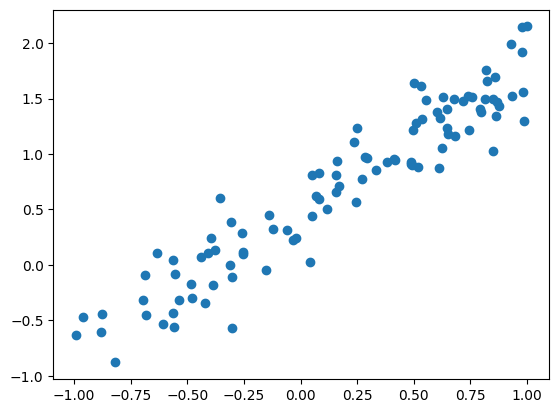

In [154]:
plt.scatter(x,y1)
# it looks like there is a possible correlation

Plot `x` against the target variable `y2`.

Do you think there is a linear relationship between `x` and the target?

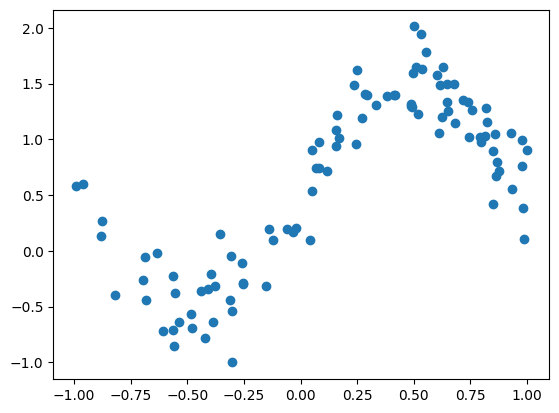

In [155]:
plt.scatter(x,y2)
# it looks like there is a possible correlation, but not a linear correlation

### Task 1b

In class you have seen the formula for the Pearson Correlation:
$\rho(a, b) = \frac{\sum_{i = 1}^{m} (a_i - \bar{a})(b_i - \bar{b})}{\sqrt{\sum_{i=1}^{m} (a_i - \bar{a})^2\sum_{i = 1}^{m}(b_i - \bar{b})^2}} $, where $\bar{a} = \frac{1}{m}\sum_{i=1}^{m} a_i$ and $\bar{b} = \frac{1}{m}\sum_{i=1}^{m} b_i$.

* Compute the Pearson Correlation $\rho$ between `x` and the target `y1`.
* Compute the Pearson Correlation between `x` and `y2`.
* Check that you get the same result as the reference implementation

In [156]:
def pearsonCorrelation(a, b):
  aMean = a.mean()
  bMean = b.mean()
  top, bottom = 0, 0

  top = np.sum((a-aMean)*(b-bMean))
  bottom += np.sum((a-aMean)**2)*np.sum((b-bMean)**2)

  return top/np.sqrt(bottom)

print(pearsonCorrelation(x, y1))
print(pearsonCorrelation(x, y2))


0.9477423215956919
0.7232525746249453


In [157]:
# Refer to the output of this cell to check whether your implementation of rho
# is correct.

from scipy.stats import pearsonr

print(f"rho(x, y1): {pearsonr(x, y1)[0]:.4f}")
print(f"rho(x, y2): {pearsonr(x, y2)[0]:.4f}")

rho(x, y1): 0.9477
rho(x, y2): 0.7233


## 📢 **HAND-IN** 📢: Report in Moodle whether you solved this task.

# Task 2 (3 Points): Univariate Linear Regression

### Task 2a

You will now implement Linear Regression with a single variable. In class you have seen that the underlying model is: $y = \theta_0 + \theta_1x$.
You also derived the maximum likelihood estimates for $\theta_0$ and $\theta_1$:

* $\hat{\theta}_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m}(x_i - \bar{x})^2}$
* $\hat{\theta}_0 = \bar{y} - \hat{\theta}_1\bar{x}$

In the following cell, implement the `.fit` and `.predict` methods: 
* In the `.predict` method you will have to apply the model to the input `x`
* In the `.fit` method you will have to compute $\hat{\theta}_0$ and $\hat{\theta}_1$.

In [158]:
class UnivariateLinearRegression:

  def __init__(self):
    self.theta_0: float = 0.
    self.theta_1: float = 0.

  def predict(self, x):
    # y = theta_0 + theta_1 * x
    return self.theta_0 + self.theta_1 * x

  def fit(self, x, y):

    self.theta_1 = np.sum((x-x.mean())*(y-y.mean())) / np.sum((x-x.mean())**2)
    self.theta_0 = y.mean() - self.theta_1 * x.mean()

    return self

### Task 2b

Fit your linear model to `x` and the target `y1` and plot the resulting residuals.

* Create an instance of the class `UnivariateLinearRegression`
* fit the model using its `.fit` method
* get the predicted values, using `.predict`


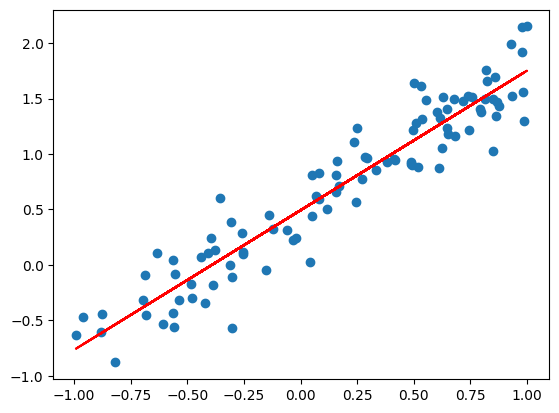

In [159]:
univariateLinearRegression = UnivariateLinearRegression()

univariateLinearRegression = univariateLinearRegression.fit(x, y1)
yPredicted = univariateLinearRegression.predict(x)

plt.scatter(x,y1)
plt.plot(x,yPredicted, "red")
plt.show()

* implement the function `plot_residuals`
* use `plot_residuals` to plot the residuals of your model
* study the residual plot: are the 4 basic assumptions fullfilled? (linearity, normality, independence, equality of variance)

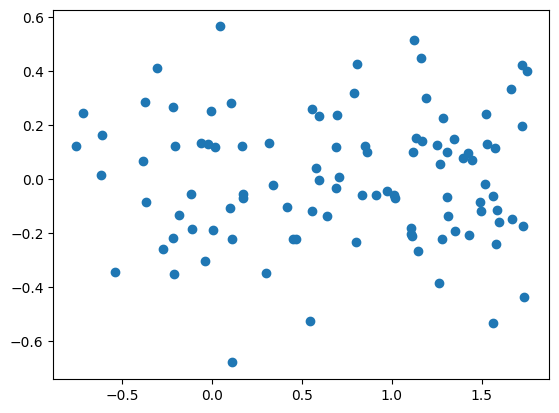

'\nlinearity: true - looks like I could draw a straight line from the left top to the right bottom (check previous plot)\nnormality: true - error is equally distributed\nindependence: true - not a sinus like graph\nequality of variance: true - similar distance to zero (residuals)\n'

In [160]:
def plot_residuals(y_pred, y_true):
  plt.scatter(y_pred, y_true - y_pred)
  plt.show()

plot_residuals(yPredicted, y1)

"""
linearity: true - looks like I could draw a straight line from the left top to the right bottom (check previous plot)
normality: true - error is equally distributed
independence: true - not a sinus like graph
equality of variance: true - similar distance to zero (residuals)
"""

* Fit another linear model to `x` and `y2`
* get the predicted values
* plot the residuals
* study the residual plot: are the 4 basic assumptions fullfilled? (linearity, normality, independence, equality of variance)

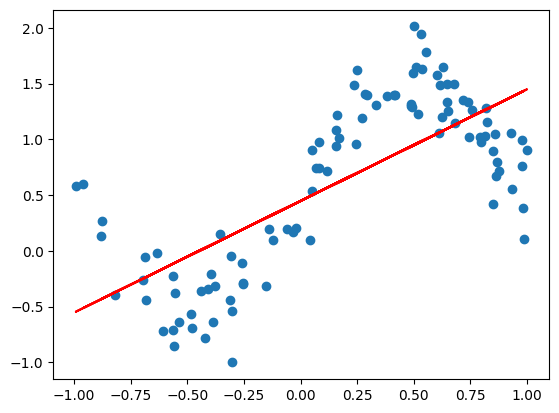

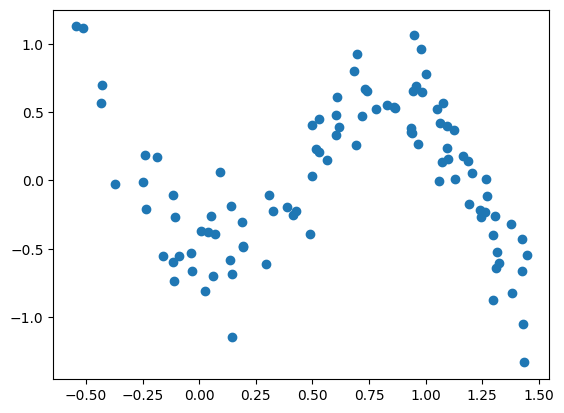

'\nlinearity: false - not possible to draw a matching straight line\nnormality: false - not equally distributed\nindependence: false - sinus like graph\nequality of variance: false - completely different distance from residual to zero\n'

In [161]:
univariateLinearRegression = univariateLinearRegression.fit(x, y2)
yPredicted = univariateLinearRegression.predict(x)

plt.scatter(x,y2)
plt.plot(x,yPredicted, "red")
plt.show()

plot_residuals(yPredicted, y2)

"""
linearity: false - not possible to draw a matching straight line
normality: false - not equally distributed
independence: false - sinus like graph
equality of variance: false - completely different distance from residual to zero
"""

## 📢 **HAND-IN** 📢: Report in Moodle whether you solved this task.

# Task 3 (4 Points): Univariate Linear Regression using Stochastic Gradient Descent

### Task 3a

In class you have seen an alternative version to estimate the parameters $\theta_i$ of the linear regression models by using Gradient Descent.

For the univariate linear regression model, the stochastic gradient descent updates look like this:
* $\theta_{0}^{(t+1)} = \theta_{0}^{(t)} - \alpha (\theta_{0}^{(t)} + \theta_{1}^{(t)} x_t - y_t)$
* $\theta_{1}^{(t+1)} = \theta_{1}^{(t)} - \alpha (\theta_{0}^{(t)} + \theta_{1}^{(t)} x_t - y_t) x_t$

Here $\alpha$ is the learning rate, and $(x_t, y_t)$ is the data point sampled
at time $t$.


In the following cell, implement the `.fit` and `.predict` methods: 
* In the `.predict` method you will have to apply the model to the input `x`.
* In the `.fit` method you will have to implement the update equations for
$\theta_0$ and $\theta_1$.

In [162]:
class SGDUnivariateLinearRegression:

  def __init__(self):
    self.theta_0: float = 0.
    self.theta_1: float = 0.
    self.rng = np.random.default_rng(RANDOM_SEED)

  def predict(self, x):
    # y = theta_0 + theta_1 * x
    return self.theta_0 + self.theta_1 * x

  def fit(self, x, y, n_iter: int = 100, learning_rate: float = 1.0):
    for t in range(n_iter):
      sample_ix = self.rng.integers(0, len(x))

      xt = x[sample_ix]
      yt = y[sample_ix]

      # TODO: update self.theta_0 and self.theta_1 according to their update equations
      next_theta_0 = self.theta_0 - learning_rate * (self.theta_0 + self.theta_1 * xt - yt)
      next_theta_1 = self.theta_1 - learning_rate * (self.theta_0 + self.theta_1 * xt - yt) * xt

      self.theta_0 = next_theta_0
      self.theta_1 = next_theta_1

    return self

### Task 3b

Run SGD for `x` and the target `y1` and compute the mean squared error (MSE).
The MSE is defined as: $\frac{1}{n}\sum_{i=1}^{n} (\hat{y}_i - y_i)^2$, where
$\hat{y}$ are the model predictions.

* Create an instance of the class `SGDUnivariateLinearRegression`
* fit the model using its `.fit` method
* get the predicted values, using `.predict`
* implement the `mse` function
* compute the MSE of your predictions

In [163]:
def mse(y_pred, y_true):
  sum = 0
  n = len(y_pred)
  for i in range(n):
    sum += (y_pred[i]-y_true[i])**2

  return (1/n)*sum

In [164]:
sgdUnivariateLinearRegression = SGDUnivariateLinearRegression()
sgdUnivariateLinearRegression = sgdUnivariateLinearRegression.fit(x, y1)
yPredicted = sgdUnivariateLinearRegression.predict(x)
print(mse(yPredicted, y1))

0.23665898370500849


### Task 3c

You will now plot the learning curves for different learning rates $\alpha$.
A learning curves shows how a model's performance changes with increasing number of update steps.
In our case we will plot the model's MSE as a function of the number of update
steps `n_iter` for different values of `learning_rate`.

In the following cell we setup most of the scaffold to create this plot. Follow
the instructions in the comments to finish the plots.

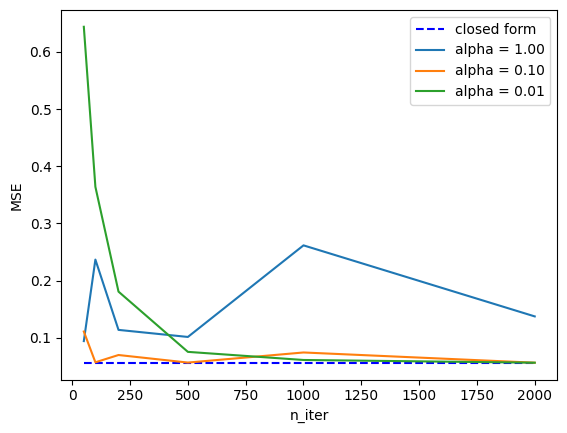

'\nThe alpha 0.01 shows us what happens when we choose the learning rate too small. We need around 500 iterations to get a go result.\nThe alpha 1.00 shows us what happens when we choose the learning rate too big. The result is jumping around from small to big and back to small.\nThe alpha 0.10 has a pretty good value with all iterations. Learning rate seems to be very good here.\n'

In [165]:
n_iters = [50, 100, 200, 500, 1000, 2000]
learning_rates = [1., .1, .01]

# we plot the MSE achieved by the closed form model as a reference
closed_form = UnivariateLinearRegression()
closed_form.fit(x, y1)
mse_base = mse(y_pred=closed_form.predict(x), y_true=y1)
plt.plot(n_iters, np.ones_like(n_iters) * mse_base, label="closed form", linestyle='--', c='b')

for alpha in learning_rates:
  mses = []
  for n_iter in n_iters:
    # fit a SGDUnivariateLinearRegression model using n_iter=n_iter and
    # learning_rate=alpha
    # compute its mse and append the mse value to the mses list
    sgdUnivariateLinearRegression = SGDUnivariateLinearRegression()
    sgdUnivariateLinearRegression = sgdUnivariateLinearRegression.fit(x, y1, n_iter=n_iter, learning_rate=alpha)
    yPredicted = sgdUnivariateLinearRegression.predict(x)

    mse_ = mse(yPredicted, y1)
    mses.append(mse_)
  plt.plot(n_iters, mses, label=f"alpha = {alpha:.2f}")

plt.xlabel("n_iter")
plt.ylabel("MSE")
plt.legend()
plt.show()

"""
The alpha 0.01 shows us what happens when we choose the learning rate too small. We need around 500 iterations to get a go result.
The alpha 1.00 shows us what happens when we choose the learning rate too big. The result is jumping around from small to big and back to small.
The alpha 0.10 has a pretty good value with all iterations. Learning rate seems to be very good here.
"""

## 📢 **HAND-IN** 📢: A PDF document containing the following:

* the final plot containing learning curves
* a short (2-3 sentences) interpretation of the curves: why do you think they look the way
they do? can you draw any conclusions?

In case you were not able to arrive at the final plot:

* include screenshots of the code you wrote so we can assign partial credit

**Solutions for Tasks 3 and 4 should be in the same document: you will only upload 1 document with your solutions for both tasks!**


# Task 4 (3 Points): Multivariate Linear Regression

In this task we will apply linear regression to non-synthetic data.
The variable `X` is a `pandas` `Dataframe` containing features and `y` contains
the target. Read through the description to get an idea of the different variables.

In [166]:
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)

X = data['data']
y = data['target']
description = data['DESCR']

print(description)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Task 4a

Implement linear regression using `sklearn`.

* create an instance of the class `sklearn.linear_model.LinearRegression`. Refer to the documentation at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* call its `.fit` method
* get the predicted values with `.predict`
* plot the residuals
* study the residual plot: are the 4 basic assumptions fullfilled? (linearity, normality, independence, equality of variance)

In [167]:
from sklearn.linear_model import LinearRegression

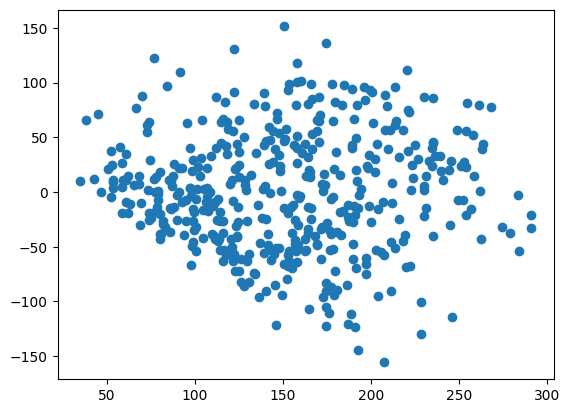

'\nlinearity: true - in general residuals distributed from left mid to right mid\nnormality: false - some errors are not equally distributed\nindependence: true - not a sinus like graph\nequality of variance: false - residuals are building a cone\n'

In [168]:
linReg = LinearRegression()
linReg.fit(X, y)
yPredicted = linReg.predict(X)
plot_residuals(yPredicted, y)

"""
linearity: true - in general residuals distributed from left mid to right mid
normality: false - some errors are not equally distributed
independence: true - not a sinus like graph
equality of variance: false - residuals are building a cone
"""

### Task 4b

The estimated parameters $\theta$ of the linear model can be found in the `.coef_` member variable. The feature names can be found in the `.feature_names_in_` member variable. They are the same as the names of the columns of `X` and should be in the same order.

Using these, answer the following questions:

* Which are the 3 most influential features?
* How do you interpret the sign of the coefficients?
* If you had to exclude 1 feature, which one would you select and why?

In [106]:
print("Estimated Parameters:")
print(linReg.coef_)
print("Feature Names:")
print(linReg.feature_names_in_)

"""
-792.17563855 -> s1, 751.27369956 -> s5, 519.84592005 -> bmi

I would say, the sign of the coefficient is not relevant for the relevance of a coefficient. Just the absolute value tells you the importance of it.
According to that I would say that feature s6 is the least relevant for the data (67.62669218) because it's the smallest coefficient.
"""

Estimated Parameters:
[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
Feature Names:
['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']


## 📢 **HAND-IN** 📢: A PDF document containing the following:

* your residual plot
* a short (2-3 sentences) interpretation of the residuals. In particular, your
assessment of the 4 basic assumptions.
* your answers to the questions in Task 4b

**Solutions for Tasks 3 and 4 should be in the same document: you will only upload 1 document with your solutions for both tasks!**
